In [1]:
import sys
import os # Pour séparer et analyser le chemin

# Afficher le chemin complet de l'exécutable
print("Chemin complet de l'exécutable Python :")
print(sys.executable)

# Extraire le nom du répertoire (souvent l'environnement)
interpreter_path = os.path.dirname(sys.executable)
print("\nRépertoire de l'interpréteur :")
print(interpreter_path)

Chemin complet de l'exécutable Python :
c:\Users\patri\AppData\Local\Programs\Python\Python310\python.exe

Répertoire de l'interpréteur :
c:\Users\patri\AppData\Local\Programs\Python\Python310


In [2]:
from random import uniform as rd
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import copy
import threading as th
import multiprocessing as mp
import pandas as pd
import time
from IPython.display import display, HTML
import dataframe_image as dfi



In [3]:
def X(n=2, d=2):
    """
    Génère toutes les combinaisons de `d` indices allant de 0 à n-1,
    sous forme de floats.
    """
    return [ [float(x) for x in t] for t in product(range(n), repeat=d) ]

def signe(x):
  if x > 0:
    return 1
  else:
    return -1


def f_OU(x):
  n = len(x)
  f_x = -1

  for i in range(n):
    if x[i] == 1:
      f_x = 1
      return f_x
    else:
      pass
  return f_x


def f_AND(x):
  n = len(x)

  f_x = 1
  for i in range(n):
    if x[i] == 0:
      f_x = -1
      return f_x
    else:
      pass
  return f_x

def f_XOR(x):
    result = 0
    for bit in x:
        result ^= int(bit)  # XOR bit à bit
    return 1 if result == 1 else -1


In [4]:
def L (f, X_ens):
  L_ens = []
  for n in range(len(X_ens)):
    L_ens.append([X_ens[n],f(X_ens[n][1:])]) #Le biais (x_0 = 1) est exclus du calcul de la fonction booleenne
  return L_ens

In [5]:
N = 2
X_ens = X(2, N)
X_ens = [[1.0] + x for x in X_ens]

In [6]:
print(X_ens)

[[1.0, 0.0, 0.0], [1.0, 0.0, 1.0], [1.0, 1.0, 0.0], [1.0, 1.0, 1.0]]


In [7]:
L_OU = L(f_OU, X_ens)
L_AND = L(f_AND, X_ens)
L_XOR = L(f_XOR, X_ens)

print(L_OU)
print(L_AND)
print(L_XOR)

[[[1.0, 0.0, 0.0], -1], [[1.0, 0.0, 1.0], 1], [[1.0, 1.0, 0.0], 1], [[1.0, 1.0, 1.0], 1]]
[[[1.0, 0.0, 0.0], -1], [[1.0, 0.0, 1.0], -1], [[1.0, 1.0, 0.0], -1], [[1.0, 1.0, 1.0], 1]]
[[[1.0, 0.0, 0.0], -1], [[1.0, 0.0, 1.0], 1], [[1.0, 1.0, 0.0], 1], [[1.0, 1.0, 1.0], -1]]


In [8]:
def f_init_Hebb(L_ens, biais):
  p = len(L_ens)
  dim = len(L_ens[0][0])

  w = []
  for i in range(dim):
    w.append(0.0)

  for k in range(p):
    w[0] = biais # Biais
    for i in range(1,dim):
      w[i] = w[i] + L_ens[k][0][i]*L_ens[k][1]

  return w

def f_init_rand(L_ens, biais):
  p = len(L_ens)
  dim = len(L_ens[0][0])

  w = []
  for i in range(dim):
    w.append(0.0)

  w[0] = biais #Ajout du biais
  for i in range(1,dim):
    w[i] = (rd(-1,1))

  return w

In [9]:
def plot_L_et_w_bias_first(L_ens, w_k):
    """
    L_ens: liste de tuples (x, t) où x = [1, x1, x2] (biais en premier)
    w_k: [w0, w1, w2] où w0 est le biais
    """
    # Extraire les points (sauter le 1 du biais)
    x1_vals = [x[1] for x, t in L_ens]
    x2_vals = [x[2] for x, t in L_ens]
    labels = [t for x, t in L_ens]

    # Créer le plot
    plt.figure(figsize=(8, 6))

    # Tracer les points
    colors = ['red' if t == -1 else 'blue' for t in labels]
    plt.scatter(x1_vals, x2_vals, c=colors, s=100, alpha=0.7,
                label=f'Classe -1 (rouge) / +1 (bleu)')

    # Tracer la droite de décision
    w0, w1, w2 = w_k[0], w_k[1], w_k[2]

    # Générer des points pour la droite
    x1_min, x1_max = min(x1_vals), max(x1_vals)

    if abs(w2) > 1e-10:  # w2 ≠ 0
        # w1*x1 + w2*x2 + w0 = 0 → x2 = -(w1*x1 + w0)/w2
        x1_line = np.array([x1_min - 1, x1_max + 1])
        x2_line = -(w1 * x1_line + w0) / w2
    else:  # droite verticale
        x_fixed = -w0 / w1
        x2_min, x2_max = min(x2_vals), max(x2_vals)
        x1_line = np.array([x_fixed, x_fixed])
        x2_line = np.array([x2_min - 1, x2_max + 1])

    plt.plot(x1_line, x2_line, 'k-', linewidth=3, label=f'{w1:.2f}·x1 + {w2:.2f}·x2 + {w0:.2f} = 0')

    # Ajouter des indications
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Perceptron - Frontière de décision')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')

    # Afficher les poids
    print(f"Équation de la droite: {w1:.3f}·x1 + {w2:.3f}·x2 + {w0:.3f} = 0")
    print(f"Vecteur normal (orthogonal à la droite): ({w1:.3f}, {w2:.3f})")
    print(f"Vecteur directeur (le long de la droite): ({-w2:.3f}, {w1:.3f})")

    plt.show()
    return w0, w1, w2

def plot_L_et_w_multiple(L_ens, W_array):
    """
    L_ens: list of tuples (x, t) where x = [1, x1, x2] (bias first)
    W_array: array-like of shape (num_vectors, 3)
        W_array[0] is the teacher (red)
        Other rows are perceptrons
    """
    # Extract points (skip bias)
    x1_vals = [x[1] for x, t in L_ens]
    x2_vals = [x[2] for x, t in L_ens]
    labels_points = [t for x, t in L_ens]

    # Plot points
    plt.figure(figsize=(10, 6))
    colors_points = ['red' if t == -1 else 'blue' for t in labels_points]
    plt.scatter(x1_vals, x2_vals, c=colors_points, s=100, alpha=0.7,
                label='Classe -1 (rouge) / +1 (bleu)')

    # Colors for perceptrons (skip red)
    num_vectors = W_array.shape[0]
    rng = np.random.default_rng()
    perceptron_colors = rng.uniform(0, 1, size=(num_vectors-1, 3))  # RGB

    # Plot all lines
    for i, w_k in enumerate(W_array):
        w0, w1, w2 = w_k[0], w_k[1], w_k[2]
        x1_min, x1_max = min(x1_vals), max(x1_vals)

        if abs(w2) > 1e-10:  # w2 != 0
            x1_line = np.array([x1_min - 1, x1_max + 1])
            x2_line = -(w1 * x1_line + w0) / w2
        else:  # vertical line
            x_fixed = -w0 / w1
            x2_min, x2_max = min(x2_vals), max(x2_vals)
            x1_line = np.array([x_fixed, x_fixed])
            x2_line = np.array([x2_min - 1, x2_max + 1])

        if i == 0:  # teacher
            plt.plot(x1_line, x2_line, 'r-', linewidth=2, label='teacher')  # thinner
        else:
            plt.plot(x1_line, x2_line, color=perceptron_colors[i-1], linewidth=1.5,
                     label=f'perceptron_{i}')  # thinner

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Perceptron - Frontières de décision')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')

    # Move legend outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()

def plot_L_et_w_multiple_fixed_axes(L_ens, W_array, xlim=None, ylim=None):
    """
    Version avec limites x et y séparées.

    xlim: tuple (x_min, x_max) ou None
    ylim: tuple (y_min, y_max) ou None
    """

    # Extraire points
    x1_vals = [x[1] for x, t in L_ens]
    x2_vals = [x[2] for x, t in L_ens]
    labels = [t for x, t in L_ens]

    # Graphique
    plt.figure(figsize=(10, 8))

    # Points
    colors = ['red' if t == -1 else 'blue' for t in labels]
    plt.scatter(x1_vals, x2_vals, c=colors, s=100, alpha=0.7,
                label='Classe -1 (rouge) / +1 (bleu)')

    # Limites automatiques si non spécifiées
    if xlim is None:
        x_min, x_max = min(x1_vals), max(x1_vals)
        x_margin = (x_max - x_min) * 0.2
        xlim = (x_min - x_margin, x_max + x_margin)

    if ylim is None:
        y_min, y_max = min(x2_vals), max(x2_vals)
        y_margin = (y_max - y_min) * 0.2
        ylim = (y_min - y_margin, y_max + y_margin)

    # Étendue pour calculer les droites (plus grande que l'affichage)
    x_line_range = np.array([xlim[0] - 10, xlim[1] + 10])

    # Tracer chaque droite
    num_vectors = len(W_array)
    colors_vectors = plt.cm.rainbow(np.linspace(0, 1, max(2, num_vectors)))

    for i, w in enumerate(W_array):
        w0, w1, w2 = w[0], w[1], w[2]

        if abs(w2) > 1e-10:
            y_line = -(w1 * x_line_range + w0) / w2
        else:
            x_fixed = -w0 / w1
            x_line_range = np.array([x_fixed, x_fixed])
            y_line = np.array([ylim[0] - 10, ylim[1] + 10])

        if i == 0:
            plt.plot(x_line_range, y_line, 'r-', linewidth=3, label='Professeur')
        else:
            plt.plot(x_line_range, y_line, color=colors_vectors[i],
                     linewidth=1.5, linestyle='--', label=f'Élève {i}')

    # FORCER les limites
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

    # Origine
    plt.scatter([0], [0], color='green', s=100, marker='*', label='Origine')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Perceptron - {num_vectors} vecteurs (axes fixés)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [10]:
#Definition des conditions initiales
biais = 1.0

L_ens = L_XOR

w_k = f_init_rand(L_OU, biais)
#w_k = f_init_Hebb(L_ens, biais)
#w_k_test = [3, 2, 5] #w0, w1, w2


[1.0, -0.8978790445749121, -0.9397699711694407]
Équation de la droite: -0.898·x1 + -0.940·x2 + 1.000 = 0
Vecteur normal (orthogonal à la droite): (-0.898, -0.940)
Vecteur directeur (le long de la droite): (0.940, -0.898)


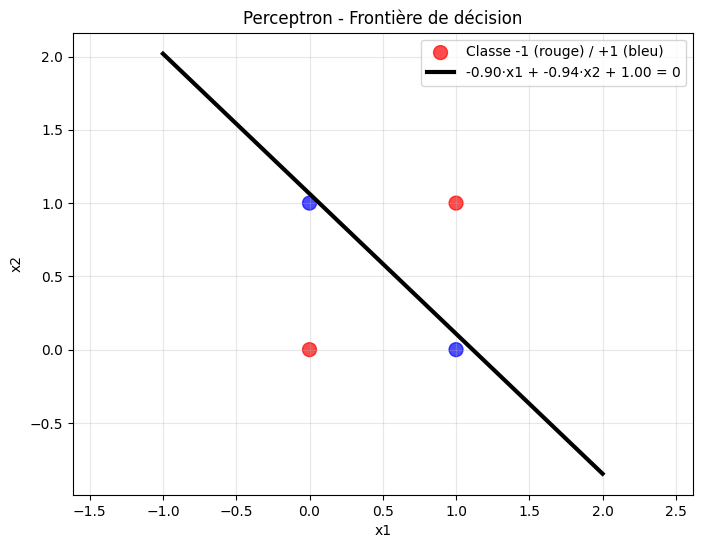

(1.0, -0.8978790445749121, -0.9397699711694407)

In [11]:
print(w_k)
plot_L_et_w_bias_first(L_ens, w_k)

In [12]:
def perceptron_online(w_vect, L_ens, eta):
  #print("in perceptron online")

  w_k = copy.deepcopy(w_vect)
  stop = 0
  while stop < 50:     # boucle sur les époques
    #print('\n'*2, '_'*20, '\n')
    #print("stop =", stop)
    nb_mal_classe = 0

    for k in range(len(L_ens)):   # boucle sur les exemples
        x_k = L_ens[k][0]
        t = L_ens[k][1]

        # produit scalaire
        w_k_scal_x_k = sum(w_k[i] * x_k[i] for i in range(len(x_k)))

        y = 1 if w_k_scal_x_k > 0 else -1
        #print("y = ", y)
        #print("t = ", t)
        if y != t:

            delta_w = eta * (t - y)
            for i in range(len(x_k)):
                w_k[i] += delta_w * x_k[i]
            nb_mal_classe += 1

    # fin de l'époque : vérification arrêt
    if nb_mal_classe == 0:
        #print("Convergence atteinte.")
        stop += 1
        break
    else:
        #print("nb_mal_classe : ", nb_mal_classe)
        stop += 1


  #print("in perceptron online - return")
  return w_k, stop-1


def perceptron_batch(w_vect, L_ens, eta):
  #print("in perceptron online")

  w_k = copy.deepcopy(w_vect)
  stop = 0

  delta_w = np.zeros(len(w_vect))

  while stop < 50:     # boucle sur les époques
    #print('\n'*2, '_'*20, '\n')
    #print("stop =", stop)
    nb_mal_classe = 0

    delta_w = np.zeros(len(w_vect))

    for k in range(len(L_ens)):   # boucle sur les exemples
        x_k = L_ens[k][0]
        t = L_ens[k][1]

        # produit scalaire
        w_k_scal_x_k = sum(w_k[i] * x_k[i] for i in range(len(x_k)))
        y = 1 if w_k_scal_x_k > 0 else -1

        #print("y = ", y)
        #print("t = ", t)

        if y != t:
            for i in range(len(x_k)):
                delta_w[i] = delta_w[i] + eta * (t - y)*x_k[i]
            nb_mal_classe += 1

    # fin de l'époque : vérification arrêt
    w_k += delta_w

    if nb_mal_classe == 0:
        #print("Convergence atteinte.")
        stop += 1
        break
    else:
        #print("nb_mal_classe : ", nb_mal_classe)
        stop += 1

  #print("in perceptron batch - return")
  return w_k, stop-1

In [13]:
eta = 0.14
w_k,_ = perceptron_online(w_k, L_ens, eta)
print("w_k:", w_k)

w_k: [0.43999999999999995, -0.617879044574912, -0.6597699711694407]


Poids finaux (biais en premier): [0.43999999999999995, -0.617879044574912, -0.6597699711694407]
Équation de la droite: -0.618·x1 + -0.660·x2 + 0.440 = 0
Vecteur normal (orthogonal à la droite): (-0.618, -0.660)
Vecteur directeur (le long de la droite): (0.660, -0.618)


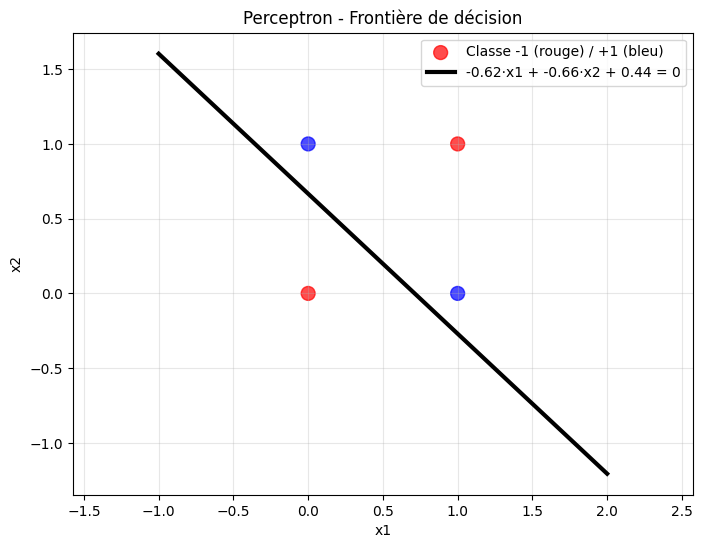

(0.43999999999999995, -0.617879044574912, -0.6597699711694407)

In [14]:
print("Poids finaux (biais en premier):", w_k)
plot_L_et_w_bias_first(L_ens, w_k)

In [15]:
#Definition des conditions initiales
biais = 1.0

#w_k = f_init_rand(L_OU, biais)
#w_k = f_init_Hebb(L_OU, biais)
w_k = [3, 2, 5] #w0, w1, w2
L_ens = L_OU

eta = 0.14
w_k,_ = perceptron_batch(w_k, L_ens, eta)
print("w_k:", w_k)

w_k: [-0.08  2.    5.  ]


Poids finaux (biais en premier): [-0.08  2.    5.  ]
Équation de la droite: 2.000·x1 + 5.000·x2 + -0.080 = 0
Vecteur normal (orthogonal à la droite): (2.000, 5.000)
Vecteur directeur (le long de la droite): (-5.000, 2.000)


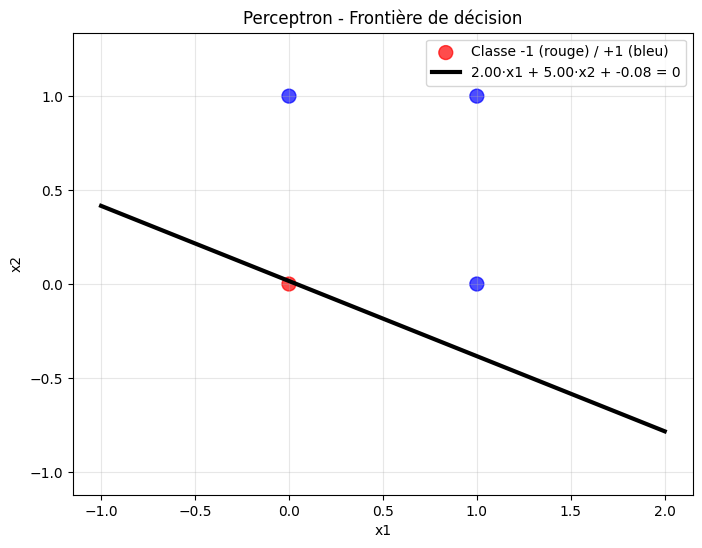

(np.float64(-0.08000000000000096), np.float64(2.0), np.float64(5.0))

In [16]:
print("Poids finaux (biais en premier):", w_k)
plot_L_et_w_bias_first(L_ens, w_k)

In [17]:
#Perceptron Professeur
N = 2
X_prof = X(2, N)

#Ajout du  bais
X_prof_N_1 = [[1.0] + x for x in X_prof]

print(X_prof_N_1)

[[1.0, 0.0, 0.0], [1.0, 0.0, 1.0], [1.0, 1.0, 0.0], [1.0, 1.0, 1.0]]


In [18]:
def init_perceptron_prof(N, biais_range=(-10e6, 10e6)):
  w_prof = np.zeros(N+1)

  biais_min, biais_max = biais_range
  w_prof[0] = np.random.uniform(biais_min, biais_max)
  for i in range(1,len(w_prof)):
      w_prof[i] = (rd(biais_min, biais_max))
  return w_prof

w_prof = init_perceptron_prof(N)
print(w_prof)

[-1224218.44914171  9050533.23943165  5695091.22705672]


In [19]:
def L_prof(X, w_prof):
  L_ens = []
  for x in X:
    L_ens.append([x,signe(np.dot(x, w_prof))])
  return L_ens

In [20]:
#w_prof=[-20,50.0,200.0]
w_prof = init_perceptron_prof(2)
L_ens = L_prof(X_prof_N_1, w_prof)
print(L_ens)

[[[1.0, 0.0, 0.0], -1], [[1.0, 0.0, 1.0], -1], [[1.0, 1.0, 0.0], -1], [[1.0, 1.0, 1.0], -1]]


Équation de la droite: -9117127.902·x1 + -9538715.189·x2 + -4135044.625 = 0
Vecteur normal (orthogonal à la droite): (-9117127.902, -9538715.189)
Vecteur directeur (le long de la droite): (9538715.189, -9117127.902)


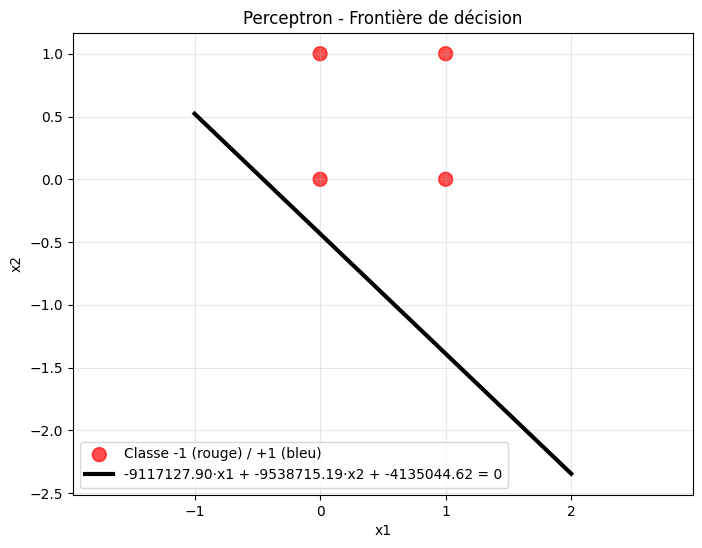

(np.float64(-4135044.624652313),
 np.float64(-9117127.902320037),
 np.float64(-9538715.189315127))

In [21]:
plot_L_et_w_bias_first(L_ens, w_prof)

In [22]:
def init_many_perceptrons(qte, N, biais_range=(-10e6, 10e6)):
  # Initialisation : N poids par perceptron (SANS biais)
  #W_many_perceptrons = np.zeros((qte, N))
  borne_min, borne_max = biais_range
  W_many_perceptrons = np.random.uniform(borne_min, borne_max, size=(qte, N))

  # Créer un nouveau array avec N+1 colonnes (N poids + biais)
  W_avec_biais = np.zeros((qte, N + 1))

  biais_min, biais_max = biais_range

  for j in range(qte):
      # Mettre le biais en première position
      W_avec_biais[j, 0] = np.random.uniform(biais_min, biais_max)
      # Copier les anciens poids aux positions 1 à N+1
      W_avec_biais[j, 1:] = W_many_perceptrons[j]

  # Remplacer l'ancienne matrice
  return W_avec_biais


qte = 20
biais_range = (-20, 20)
W_perceptrons = init_many_perceptrons(qte, N, biais_range)

print(len(W_perceptrons))
print(W_perceptrons)

W_perceptron_batch = init_many_perceptrons(qte, N, biais_range)




20
[[ -2.65929925  -5.20364491   6.8676587 ]
 [ -3.39791833  17.04468253  17.14253349]
 [ 11.52906136 -17.77946772 -16.18229012]
 [ 18.79434491  -9.23982414 -10.53095095]
 [-14.62607498  13.97250364 -12.06805194]
 [ -2.49601787  -4.21641541  -4.15127088]
 [ 13.52727908 -14.26644511  -9.24692181]
 [ -8.60455047  17.82819757  16.10625485]
 [  3.07809595   0.5048425  -11.18673404]
 [  8.12947929  -5.1013592    0.71551771]
 [ 17.71029736   2.85031598 -14.02197968]
 [ -6.14865219 -12.92504169  -8.97116912]
 [-13.40934263 -17.54075515  -2.71153707]
 [-10.96939173   9.03763452   2.56176019]
 [-14.77752113 -19.48580312  10.8655393 ]
 [ 10.58005808   5.04983937  -5.16649981]
 [  2.48344466  17.71404828  -5.96478638]
 [ -4.2808194    4.60404089  14.76665331]
 [-19.73167496   5.65751853  13.61633104]
 [ 10.56406519  13.656653   -18.49081912]]


In [23]:
def create_points(nbPoints, N, bornes=(-10e6,10e6)): #Ajout de 1.0 au début pour le biais
  points = []
  borne_min, borne_max = bornes
  for p in range(nbPoints):
    point = []
    point.append(1.0) #Le biais
    for i in range(N):
      x_i = rd(borne_min, borne_max)
      point.append(x_i)
    points.append(point)

  return points

nbPoints = 10
N = 4
points = create_points(nbPoints, N)

In [24]:
def recouvrement(vect1, vect2):
  produit_scalaire = np.dot(vect1, vect2)
  norme_vect_1 = np.linalg.norm(vect1)
  norme_vect_2 = np.linalg.norm(vect2)

  R = ( produit_scalaire / (norme_vect_1*norme_vect_2) )

  return R


vect1 = np.array([1,0])
vect2 = np.array([0,-1])

R = recouvrement(vect1, vect2)
print(R)

0.0


[ 5.1947557   2.28530157 -3.70954719]
Équation de la droite: 2.285·x1 + -3.710·x2 + 5.195 = 0
Vecteur normal (orthogonal à la droite): (2.285, -3.710)
Vecteur directeur (le long de la droite): (3.710, 2.285)


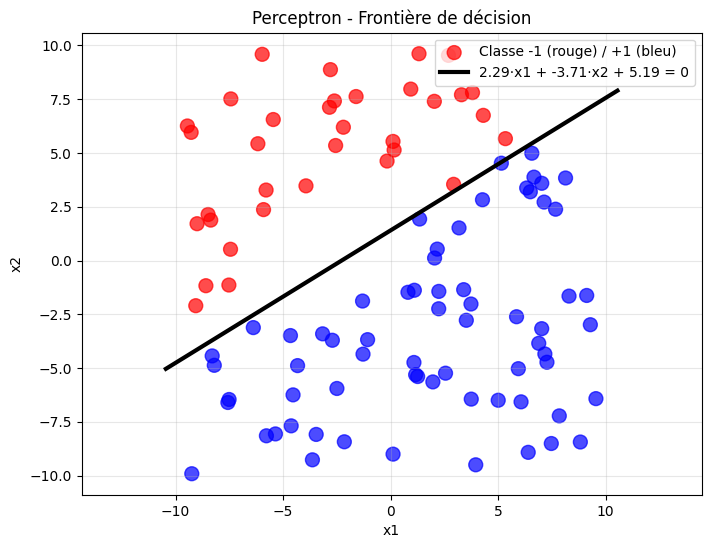

(np.float64(5.194755696921591),
 np.float64(2.2853015662027136),
 np.float64(-3.709547189389564))

In [25]:
P = 100
N = 2

bornes = (-10,10)

#Créer P points de dimension N+1 (pour le biais)
points = create_points(P, N, bornes)

w_prof = init_perceptron_prof(2, bornes)

print(w_prof)
#Création de l'ensemble d'apprentissage L_prof avec w_prof
L_ens = L_prof(points, w_prof)

plot_L_et_w_bias_first(L_ens, w_prof)

[ 7.24208167  3.32153456 -5.28636829]
5
Poids finaux (biais en premier): [-0.08  2.    5.  ]
Équation de la droite: 3.322·x1 + -5.286·x2 + 7.242 = 0
Vecteur normal (orthogonal à la droite): (3.322, -5.286)
Vecteur directeur (le long de la droite): (5.286, 3.322)


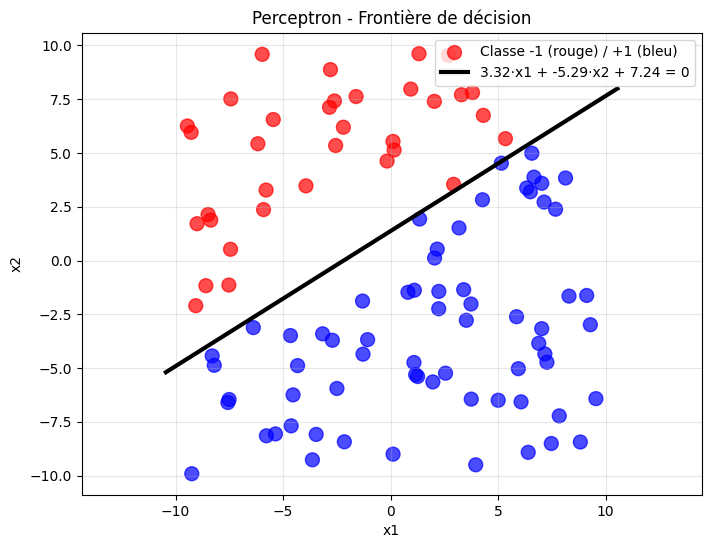

(np.float64(7.242081671753999),
 np.float64(3.3215345555502207),
 np.float64(-5.286368291995149))

In [26]:
#Entraine un perceptron sur L_ens créé par L_prof()
def train_perceptron (perceptron, L_ens, eta, algorithme):
  #modifier les deux algos pour qu'il retourne les nbIter
  if algorithme == "online":
    perceptron, nbIter = perceptron_online(perceptron, L_ens, eta)
  elif algorithme == "batch":
    perceptron, nbIter = perceptron_batch(perceptron, L_ens, eta)

  return perceptron, nbIter

perceptron = W_perceptrons[1]

perceptron, nbIter = train_perceptron(perceptron, L_ens, eta, "online")
print(perceptron)
print(nbIter)

print("Poids finaux (biais en premier):", w_k)
plot_L_et_w_bias_first(L_ens, perceptron)


In [27]:
def make_tirage(W_many_perceptrons, w_prof, eta, N, P, bornes, algorithme, points = None):

  local_W_many_perceptrons = copy.deepcopy(W_many_perceptrons)
  nb_perceptron = len(local_W_many_perceptrons)
  moyennes = np.zeros((nb_perceptron, 2))

  #Créer P points de dimension N+1 (pour le biais)
  if points is None:
    borne_min, borne_max = bornes
    points = create_points(P, N, bornes)

  #Création de l'ensemble d'apprentissage L_prof avec w_prof
  L_ens = L_prof(points, w_prof)

  #Entrainement en // des 20 Perceptrons : index 'l'
  threads = []
  results = [None] * nb_perceptron

  def worker(l):
    perceptron = local_W_many_perceptrons[l]
    new_weights, nbIter = train_perceptron(perceptron, L_ens, eta, algorithme)
    R = recouvrement(w_prof, new_weights)
    results[l] = (nbIter, R, new_weights)

  for l in range(nb_perceptron):
    t = th.Thread(target=worker, args=(l,))
    t.start()
    threads.append(t)

  for t in threads:
    t.join()

  for l in range(nb_perceptron):
    nbIter, R, new_w = results[l]
    local_W_many_perceptrons[l] = new_w
    #print("\n","-"*20, "\n")
    #print("nbIter :", nbIter)
    #print("R :", R)
    #print("\n","-"*20, "\n")
    moyennes[l, 0] = nbIter
    moyennes[l, 1] = R

  return local_W_many_perceptrons, moyennes, L_ens

In [28]:
# --- Fonction Worker Dédiée au Pool ---
# Cette fonction doit être définie au niveau du module (global) pour être picklée et envoyée aux processus
def train_perceptron_worker(args):
    """
    Fonction enveloppe pour l'entraînement d'un seul perceptron dans un processus séparé.
    Retourne les résultats et le poids final.
    """
    # Dépaquetage des arguments
    initial_weights, L_ens, eta, algorithme, w_prof = args
    
    # Entraînement et calcul des métriques
    # On suppose que train_perceptron ne modifie pas initial_weights et retourne new_weights.
    new_weights, nbIter = train_perceptron(initial_weights, L_ens, eta, algorithme)
    R = recouvrement(w_prof, new_weights)
    
    # Retourne le résultat du travail : (nbIter, R, new_weights)
    return nbIter, R, new_weights


def make_tirage_multiprocessing(W_many_perceptrons, w_prof, eta, N, P, bornes, algorithme, points=None):
    """
    Exécute l'entraînement de plusieurs perceptrons en parallèle en utilisant des processus
    pour contourner le GIL.
    """
    
    # 1. PRÉPARATION ET PROTECTION DES DONNÉES
    
    # Créer une copie profonde immédiate de la liste des poids d'entrée. 
    # Cette copie locale est passée au Pool, l'original W_many_perceptrons n'est pas touché.
    local_W_many_perceptrons = copy.deepcopy(W_many_perceptrons)
    nb_perceptron = len(local_W_many_perceptrons)
    
    # Créer les points si non fournis.
    if points is None:
        points = create_points(P, N, bornes)
        
    # Création de l'ensemble d'apprentissage L_prof
    L_ens = L_prof(points, w_prof)

    # 2. PRÉPARATION DES ARGUMENTS POUR LE POOL
    
    # Création d'une liste d'arguments pour chaque perceptron
    # Le Pool se chargera de distribuer ces arguments aux processus worker.
    tasks = [
        (local_W_many_perceptrons[l], L_ens, eta, algorithme, w_prof)
        for l in range(nb_perceptron)
    ]

    # 3. EXÉCUTION EN PARALLÈLE (Multiprocessing Pool)
    
    # Utilisation d'un Pool de processus. Par défaut, il utilise le nombre de cœurs de CPU.
    # Le 'with' gère automatiquement la fermeture et la jointure des processus.
    with mp.Pool() as pool:
        # map() distribue les tâches et bloque jusqu'à ce que tous les résultats soient collectés
        # results est une liste d'éléments retournés par train_perceptron_worker.
        results = pool.map(train_perceptron_worker, tasks)

    # 4. AGRÉGATION DES RÉSULTATS
    
    moyennes = np.zeros((nb_perceptron, 2))
    new_weights_list = [None] * nb_perceptron
    
    for l, (nbIter, R, new_w) in enumerate(results):
        moyennes[l, 0] = nbIter
        moyennes[l, 1] = R
        new_weights_list[l] = new_w

    # Retourne les poids finaux (séparés de l'entrée), les métriques, et l'ensemble d'apprentissage
    return new_weights_list, moyennes, L_ens

# --- Important : Lors de l'appel, assurez-vous que le code est dans un bloc if __name__ == "__main__": ---
# Cela est crucial pour multiprocessing sur Windows et dans les notebooks.
# Exemple d'appel :
# if __name__ == "__main__":
#     # Votre code d'exécution ici
#     W_final, moy, L_set = make_tirage_multiprocessing(...)

In [29]:
N = 2
P = 10
nb_perceptrons = 20

biais_range = (-20,20)

W_perceptrons = init_many_perceptrons(nb_perceptrons, N, biais_range)
w_prof = init_perceptron_prof(N, biais_range)

eta0 = 0.8

In [30]:
points = create_points(P, N, biais_range)

In [31]:
algorithme = "online"
trained_perceptrons, moyennes, L_ens = make_tirage(W_perceptrons, w_prof, eta, N, P, biais_range, algorithme, points)

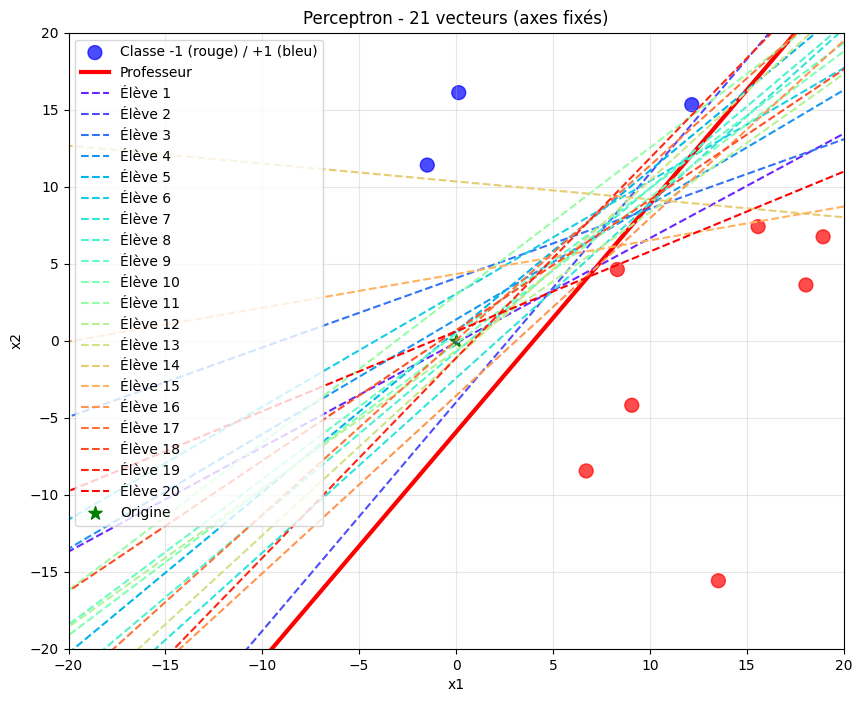

In [32]:
all_array = np.vstack([w_prof,trained_perceptrons])

x_lim = 20
y_lim = 20
plot_L_et_w_multiple_fixed_axes(L_ens, all_array, (-x_lim, x_lim), (-y_lim, y_lim))


In [33]:
df_nbIter=pd.DataFrame(moyennes,columns=['Nbre_iter_convergence', 'Recouvrement R'])
df_nbIter.index.name = 'Perceptron #'
print(df_nbIter)

Nb_iter_moyen, R_moyen = np.mean(moyennes[:, 0]), np.mean(moyennes[:, 1])
print("-"*20, '\n' )
print("Nb_iter_moyen :", Nb_iter_moyen)
print("R_moyen :", R_moyen)

              Nbre_iter_convergence  Recouvrement R
Perceptron #                                       
0                               1.0        0.366324
1                               4.0        0.991765
2                               1.0       -0.860619
3                               3.0       -0.527834
4                               4.0       -0.104443
5                               3.0       -0.784091
6                               3.0        0.964151
7                               3.0        0.682887
8                               2.0       -0.026937
9                               2.0        0.398771
10                              3.0       -0.747049
11                              1.0        0.662230
12                              4.0        0.796924
13                              0.0       -0.940208
14                              1.0       -0.883816
15                              4.0        0.993074
16                              1.0        0.266623
17          

In [34]:
algorithme = "batch"
trained_perceptrons, moyennes, L_ens = make_tirage(W_perceptrons, w_prof, eta, N, P, biais_range, algorithme, points)

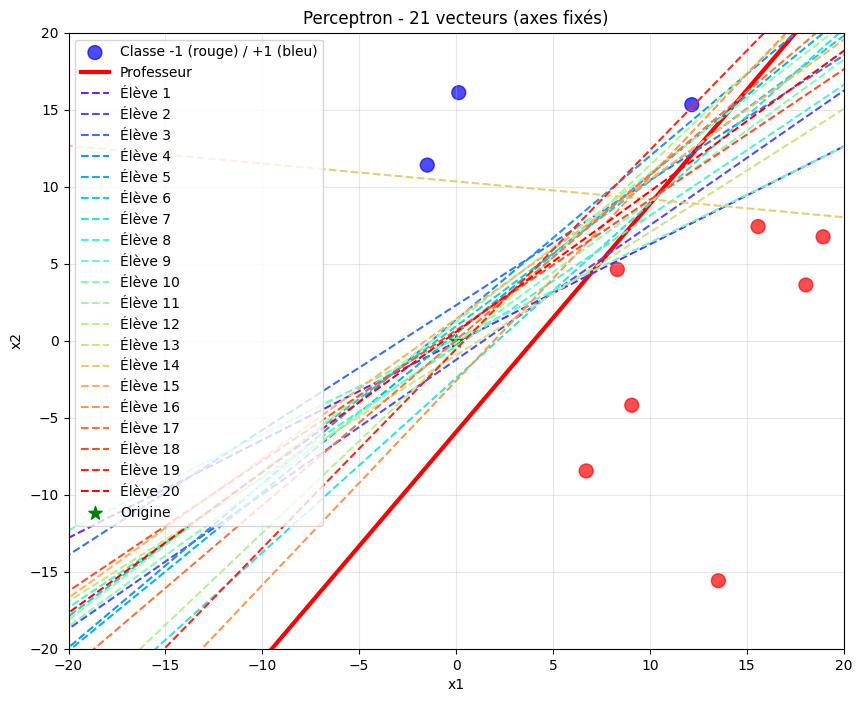

In [35]:
all_array = np.vstack([w_prof,trained_perceptrons])

x_lim = 20
y_lim = 20
plot_L_et_w_multiple_fixed_axes(L_ens, all_array, (-x_lim, x_lim), (-y_lim, y_lim))

In [36]:
df_nbIter=pd.DataFrame(moyennes,columns=['Nbre_iter_convergence', 'Recouvrement R'])
df_nbIter.index.name = 'Perceptron #'
print(df_nbIter)

Nb_iter_moyen, R_moyen = np.mean(moyennes[:, 0]), np.mean(moyennes[:, 1])
print("-"*20, '\n' )
print("Nb_iter_moyen :", Nb_iter_moyen)
print("R_moyen :", R_moyen)

              Nbre_iter_convergence  Recouvrement R
Perceptron #                                       
0                               2.0        0.340620
1                               3.0        0.857206
2                               1.0       -0.701124
3                               2.0       -0.440868
4                               2.0       -0.020584
5                               2.0       -0.308427
6                               3.0        0.964151
7                               3.0        0.524739
8                               5.0        0.149110
9                               1.0        0.388572
10                              2.0       -0.417673
11                              2.0        0.587074
12                              1.0        0.789489
13                              0.0       -0.940208
14                              2.0       -0.499523
15                              2.0        0.962176
16                              4.0        0.260027
17          

In [37]:
#Meilleure convergence avec la méthode batch

In [38]:
eta1 = eta0/2
eta2 = eta0/10

algos = ['online','batch']
tests_conf_eta = [eta0, eta1, eta2]
tests_conf_P = [10, 100, 500, 1000]
tests_conf_N = [2, 10, 100, 5000]

param_combinaison = list(product(tests_conf_eta, algos, tests_conf_P, tests_conf_N))

print(param_combinaison)

column_names = ['eta', 'Algorithme', 'Nombre de points P', 'Dimension N']

#Creation du dataframe pour le stockage des paramètres de test
results = pd.DataFrame(param_combinaison, columns=column_names)

#Ajout des deux colonnes pour le stockage des moyennes
results['Avg_nbIter'] = np.nan
results['Avg_R'] = np.nan

print(f"Dimensions du DataFrame (lignes, colonnes) : {results.shape}")
print("-" * 50)
print("Aperçu du DataFrame de Configuration :")
print(results)

[(0.8, 'online', 10, 2), (0.8, 'online', 10, 10), (0.8, 'online', 10, 100), (0.8, 'online', 10, 5000), (0.8, 'online', 100, 2), (0.8, 'online', 100, 10), (0.8, 'online', 100, 100), (0.8, 'online', 100, 5000), (0.8, 'online', 500, 2), (0.8, 'online', 500, 10), (0.8, 'online', 500, 100), (0.8, 'online', 500, 5000), (0.8, 'online', 1000, 2), (0.8, 'online', 1000, 10), (0.8, 'online', 1000, 100), (0.8, 'online', 1000, 5000), (0.8, 'batch', 10, 2), (0.8, 'batch', 10, 10), (0.8, 'batch', 10, 100), (0.8, 'batch', 10, 5000), (0.8, 'batch', 100, 2), (0.8, 'batch', 100, 10), (0.8, 'batch', 100, 100), (0.8, 'batch', 100, 5000), (0.8, 'batch', 500, 2), (0.8, 'batch', 500, 10), (0.8, 'batch', 500, 100), (0.8, 'batch', 500, 5000), (0.8, 'batch', 1000, 2), (0.8, 'batch', 1000, 10), (0.8, 'batch', 1000, 100), (0.8, 'batch', 1000, 5000), (0.4, 'online', 10, 2), (0.4, 'online', 10, 10), (0.4, 'online', 10, 100), (0.4, 'online', 10, 5000), (0.4, 'online', 100, 2), (0.4, 'online', 100, 10), (0.4, 'online'

In [39]:
def make_n_tirages(eta, P, N, nb_tirage, nb_perceptrons, init_range, algo1, algo2):
    #20 Perceptrons aléatoire per paire (N/P) : ils sont initialisés avant la boucle des 100 tirages
    W_perceptrons = init_many_perceptrons(nb_perceptrons, N, init_range)
    w_prof = init_perceptron_prof(N, init_range)

    nb_iter_online_temp = []
    R_online_temp = []
    temps_online_total = 0.0

    nb_iter_batch_temp = []
    R_batch_temp = []
    temps_batch_total = 0.0

    for tir in range(nb_tirage):
        #print("tirage n : ", tir, '-'*10, "checkpoint 1")
        #Creation d'un point set per tirage
        points = create_points(P, N, init_range)
        #print("tirage n : ", tir, '-'*10, "checkpoint 2")
        
        #Appel fonction d'entraînement des 20 perceptrons en parallèle avec les deux algortime
        temps_start_online = time.perf_counter()
        algo = 'online'
        _, moyennes_online, _ = make_tirage(W_perceptrons, w_prof, eta, N, P, init_range, algo1, points)
        temps_online_total += (time.perf_counter() - temps_start_online)
        #print("tirage n : ", tir, '-'*10, "checkpoint 3")
        
        nb_iter_online_temp.append(np.mean(moyennes_online[:, 0])) #Moyenne sur les 20 perceptrons entraîné sur le tirage
        R_online_temp.append(np.mean(moyennes_online[:, 1]))
        #print("tirage n : ", tir, '-'*10, "checkpoint 4")
        
        temps_start_batch = time.perf_counter()
        algo = 'batch'
        _, moyennes_batch, _ = make_tirage(W_perceptrons, w_prof, eta, N, P, init_range, algo2, points)
        nb_iter_batch_temp.append(np.mean(moyennes_batch[:, 0])) #Idem
        R_batch_temp.append(np.mean(moyennes_batch[:, 1]))
        temps_batch_total += (time.perf_counter() - temps_start_batch)
        #print("tirage n : ", tir, '-'*10, "checkpoint 5")
        
    #Moyenne sur les 100 tirages
    nb_iter_online_moyen = np.mean(nb_iter_online_temp)
    R_online_moyen = np.mean(R_online_temp)

    nb_iter_batch_moyen = np.mean(nb_iter_batch_temp)
    R_iter_batch_moyen = np.mean(R_batch_temp)

    return (nb_iter_online_moyen, R_online_moyen, temps_online_total,
            nb_iter_batch_moyen, R_iter_batch_moyen, temps_batch_total)

In [40]:
eta = eta0
P = 10
N = 2

NB_TIRAGE = 100
NB_PERCEPTRONS = 20
BIAIS_RANGE = (-20, 20)

(nb_iter_online, R_online, temps_online,
     nb_iter_batch, R_batch, temps_batch) = make_n_tirages(
        eta=eta,
        P=P,
        N=N,
        nb_tirage=NB_TIRAGE,
        nb_perceptrons=NB_PERCEPTRONS,
        init_range=BIAIS_RANGE, # Correspond à 'biais_range' dans la fonction
        algo1='online',
        algo2='batch'
    )

print("nb_iter_online : ", nb_iter_online,"\n",
    " R_online : ", R_online,"\n",
    "temps_total_online:", temps_online, "\n",
    " nb_iter_batch : ", nb_iter_batch,"\n",
    " R_batch: ", R_batch,"\n",
    "temps_total_batch:", temps_batch
)

nb_iter_online :  2.3645 
  R_online :  0.8584518075830054 
 temps_total_online: 0.5652319004293531 
  nb_iter_batch :  2.9835000000000003 
  R_batch:  0.9018102375887667 
 temps_total_batch: 0.5990535996388644


In [ ]:
tests_conf_eta = [eta0, eta0/2, eta0/10]
tests_conf_P = [10, 100, 500, 1000]
tests_conf_N = [2, 10, 100, 5000]

# Paramètres globaux pour la simulation
NB_TIRAGE = 30
NB_PERCEPTRONS = 20
BIAIS_RANGE = (-20, 20)

# Création d'un DataFrame temporaire contenant uniquement les combinaisons uniques (eta, P, N)
# Nous filtrons les algorithmes car make_n_tirages les gère en interne.
unique_combinations = pd.DataFrame(
    list(product(tests_conf_eta, tests_conf_P, tests_conf_N)),
    columns=['eta', 'Nombre de points P', 'Dimension N']
)

# Initialisation du DataFrame de résultats final
# Le DataFrame final doit contenir des lignes distinctes pour 'online' et 'batch'.
results_data = []

# --- 2. Boucle de Simulation ---

print("Démarrage des simulations (un appel à make_n_tirages pour chaque combinaison eta/P/N)...")

for index, row in unique_combinations.iterrows():
    eta = row['eta']
    P = int(row['Nombre de points P'])
    N = int(row['Dimension N'])

    print(f"\n--- Running: eta={eta:.4f}, P={P}, N={N} ---")

    # Appel de la fonction pour obtenir les moyennes des 100 tirages pour les deux algos
    (nb_iter_online, R_online, temps_online,
     nb_iter_batch, R_batch, temps_batch) = make_n_tirages(
        eta=eta,
        P=P,
        N=N,
        nb_tirage=NB_TIRAGE,
        nb_perceptrons=NB_PERCEPTRONS,
        init_range=BIAIS_RANGE, # Correspond à 'biais_range' dans la fonction
        algo1='online',
        algo2='batch'
    )

    # 3. Stocker les résultats dans un format adapté au DataFrame final
    # On ajoute DEUX lignes pour chaque appel : une pour 'online' et une pour 'batch'
    
    # Résultat Online
    results_data.append({
        'eta': eta,
        'Algorithme': 'online',
        'Nombre de points P': P,
        'Dimension N': N,
        'Avg_nbIter': nb_iter_online,
        'Avg_R': R_online,
        'Temps_execution_s': temps_online,
    })

    # Résultat Batch
    results_data.append({
        'eta': eta,
        'Algorithme': 'batch',
        'Nombre de points P': P,
        'Dimension N': N,
        'Avg_nbIter': nb_iter_batch,
        'Avg_R': R_batch,
        'Temps_execution_s': temps_batch
    })






Démarrage des simulations (un appel à make_n_tirages pour chaque combinaison eta/P/N)...

--- Running: eta=0.8000, P=10, N=2 ---

--- Running: eta=0.8000, P=10, N=10 ---

--- Running: eta=0.8000, P=10, N=100 ---

--- Running: eta=0.8000, P=10, N=5000 ---

--- Running: eta=0.8000, P=100, N=2 ---

--- Running: eta=0.8000, P=100, N=10 ---

--- Running: eta=0.8000, P=100, N=100 ---

--- Running: eta=0.8000, P=100, N=5000 ---

--- Running: eta=0.8000, P=500, N=2 ---

--- Running: eta=0.8000, P=500, N=10 ---

--- Running: eta=0.8000, P=500, N=100 ---

--- Running: eta=0.8000, P=500, N=5000 ---

--- Running: eta=0.8000, P=1000, N=2 ---

--- Running: eta=0.8000, P=1000, N=10 ---

--- Running: eta=0.8000, P=1000, N=100 ---

--- Running: eta=0.8000, P=1000, N=5000 ---

--- Running: eta=0.4000, P=10, N=2 ---

--- Running: eta=0.4000, P=10, N=10 ---

--- Running: eta=0.4000, P=10, N=100 ---

--- Running: eta=0.4000, P=10, N=5000 ---

--- Running: eta=0.4000, P=100, N=2 ---

--- Running: eta=0.4000

In [70]:
print(results_data)

[{'eta': np.float64(0.8), 'Algorithme': 'online', 'Nombre de points P': 10, 'Dimension N': 2, 'Avg_nbIter': np.float64(4.1899999999999995), 'Avg_R': np.float64(0.8149527565971281), 'Temps_execution_s': 2.2810604998175008e-07}, {'eta': np.float64(0.8), 'Algorithme': 'batch', 'Nombre de points P': 10, 'Dimension N': 2, 'Avg_nbIter': np.float64(5.7283333333333335), 'Avg_R': np.float64(0.8543167094962517), 'Temps_execution_s': 2.5507790125607525e-07}, {'eta': np.float64(0.8), 'Algorithme': 'online', 'Nombre de points P': 10, 'Dimension N': 10, 'Avg_nbIter': np.float64(2.3249999999999997), 'Avg_R': np.float64(0.5609839269478077), 'Temps_execution_s': 2.3419913536880485e-07}, {'eta': np.float64(0.8), 'Algorithme': 'batch', 'Nombre de points P': 10, 'Dimension N': 10, 'Avg_nbIter': np.float64(3.1), 'Avg_R': np.float64(0.5843385853948989), 'Temps_execution_s': 2.615853087735121e-07}, {'eta': np.float64(0.8), 'Algorithme': 'online', 'Nombre de points P': 10, 'Dimension N': 100, 'Avg_nbIter': np

In [69]:
# --- 4. Création du DataFrame final - Avant post traitement---

# Convertir la liste de résultats en DataFrame
df_results = pd.DataFrame(results_data)

print("\nSimulations terminées.")
print(f"DataFrame de résultats final créé. Shape : {df_results.shape}")
print(df_results.head())

# Sauvegarder les résultats dans un fichier CSV
df_results.to_csv('perceptron_results_saved_30_iter.csv', index=False)
print("DataFrame sauvegardé en 'perceptron_results_saved_30_iter.csv'.")


Simulations terminées.
DataFrame de résultats final créé. Shape : (96, 7)
   eta Algorithme  Nombre de points P  Dimension N  Avg_nbIter     Avg_R  \
0  0.8     online                  10            2    4.190000  0.814953   
1  0.8      batch                  10            2    5.728333  0.854317   
2  0.8     online                  10           10    2.325000  0.560984   
3  0.8      batch                  10           10    3.100000  0.584339   
4  0.8     online                  10          100    1.840000  0.216109   

   Temps_execution_s  
0       2.281060e-07  
1       2.550779e-07  
2       2.341991e-07  
3       2.615853e-07  
4       7.217541e-07  
DataFrame sauvegardé en 'perceptron_results_saved_30_iter.csv'.


In [68]:
print(NB_TIRAGE)
#Post traitement pour récuperer le temps par tirage (1 tirage = 20 perceptrons entraîné en parallèle)
result_post_traitement = results_data
for result in result_post_traitement:
    result['Temps_execution_s'] =  result['Temps_execution_s'] / NB_TIRAGE


# --- 4. Création du DataFrame final après post traitement ---

# Convertir la liste de résultats en DataFrame
df_results_post_traitement = pd.DataFrame(result_post_traitement)

print("\nSimulations terminées.")
print(f"DataFrame de résultats final créé. Shape : {df_results_post_traitement.shape}")
print(df_results.head())

# Sauvegarder les résultats dans un fichier CSV
df_results_post_traitement.to_csv('perceptron_results_saved_30_iter_apres_post_traitement.csv', index=False)
print("DataFrame sauvegardé en 'perceptron_results_saved_30_iter.csv'.")


30

Simulations terminées.
DataFrame de résultats final créé. Shape : (96, 7)
   eta Algorithme  Nombre de points P  Dimension N  Avg_nbIter     Avg_R  \
0  0.8     online                  10            2    4.190000  0.814953   
1  0.8      batch                  10            2    5.728333  0.854317   
2  0.8     online                  10           10    2.325000  0.560984   
3  0.8      batch                  10           10    3.100000  0.584339   
4  0.8     online                  10          100    1.840000  0.216109   

   Temps_execution_s  
0           0.000007  
1           0.000008  
2           0.000007  
3           0.000008  
4           0.000022  
DataFrame sauvegardé en 'perceptron_results_saved_30_iter.csv'.


In [71]:
df_results_imported = pd.read_csv('perceptron_results_saved_30_iter.csv')
print("DataFrame 'perceptron_results_saved_30_iter_apres_post_traitement.csv' rechargé avec succès depuis le fichier CSV.")
print(f"Dimensions : {df_results_imported.shape}")

DataFrame 'perceptron_results_saved_30_iter_apres_post_traitement.csv' rechargé avec succès depuis le fichier CSV.
Dimensions : (96, 7)


In [72]:
# --- FONCTION D'AFFICHAGE DE LÉGENDE (COLORBAR) ---
def display_colorbar(cmap_name, vmin, vmax, label, filename=None, figsize=(10, 0.4)):
    """
    Affiche une Colorbar simple pour servir de légende à la carte thermique et la sauvegarde en JPG.
    """
    cmap = plt.colormaps[cmap_name]
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    cb = plt.colorbar(
        plt.cm.ScalarMappable(norm=norm, cmap=cmap),
        cax=ax,
        orientation='horizontal',
        label=label
    )
    plt.tight_layout()
    
    # --- AJOUT DE LA LOGIQUE DE SAUVEGARDE ---
    if filename:
        try:
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            print(f"[Sauvegardé] : {filename}")
        except Exception as e:
            print(f"Erreur lors de la sauvegarde de {filename}: {e}")
            
    plt.show() # Affiche le graphique dans le notebook après la sauvegarde (si non sauv. il était déjà affiché)

def create_styled_comparison_table(df_results, current_eta, all_etas_min_max):
    """
    Crée trois tableaux de contingence N x P (R, NbIter, Temps) consolidés
    (Online vs Batch) pour un ETA donné, et applique une coloration cohérente
    basée sur les min/max globaux.
    """
    
    # Filtrer par ETA courant
    df_eta = df_results[df_results['eta'] == current_eta].copy()
    
    # Définition des métriques et des labels (DICTIONNAIRE)
    metrics = {
        'Avg_R': 'Recouvrement R',
        'Avg_nbIter': 'Nb. Itérations Moy.',
        'Temps_execution_s': 'Temps (s)'
    }
    
    styled_results = {}

    for metric_col, metric_label in metrics.items():
        
        # --- Création du tableau pivot N x P consolidé (Online + Batch) ---
        pivot_online = df_eta[df_eta['Algorithme'] == 'online'].pivot_table(
            index='Dimension N', columns='Nombre de points P', values=metric_col
        )
        pivot_batch = df_eta[df_eta['Algorithme'] == 'batch'].pivot_table(
            index='Dimension N', columns='Nombre de points P', values=metric_col
        )
        
        # Concaténation des deux tableaux côte à côte
        comparison_df = pd.concat(
            [pivot_online, pivot_batch], 
            axis=1, 
            keys=['Online', 'Batch'] # Macro-colonnes
        )
        
        styled_df = comparison_df.style
        
        # --- Récupérer les min/max globaux pour une échelle cohérente ---
        vmin = all_etas_min_max[metric_col]['min']
        vmax = all_etas_min_max[metric_col]['max']
        
        # --- Application des Couleurs et du Formatage ---
        
        if metric_col == 'Avg_R':
            # R: Vert (bien) à Rouge (mal). Inversion de 'RdYlGn'.
            cmap_name = 'RdYlGn' 
            styled_df = styled_df.background_gradient(
                cmap=cmap_name, vmin=vmin, vmax=vmax
            ).format(formatter='{:.3f}')
            
        elif metric_col == 'Avg_nbIter':
            # NbIter: Clair (faible) à Sombre (élevé).
            cmap_name = 'YlOrBr' 
            styled_df = styled_df.background_gradient(
                cmap=cmap_name, vmin=vmin, vmax=vmax
            ).format(formatter='{:.0f}')
            
        elif metric_col == 'Temps_execution_s':
            # Temps: Clair (rapide) à Sombre (lent).
            cmap_name = 'viridis' 
            styled_df = styled_df.background_gradient(
                cmap=cmap_name, vmin=vmin, vmax=vmax
            ).format(formatter='{:.4f}')

        # --- Définir la largeur des colonnes via CSS pour uniformité ---
        styles = [
            # Applique la largeur à toutes les colonnes sauf l'index
            {'selector': 'th:not(.index_name)', 'props': [('width', '80px')]}
        ]
        styled_df = styled_df.set_table_styles(styles)

        # Mise à jour des noms de colonnes pour l'affichage
        styled_df.columns.names = ['Algorithme', 'P']
        styled_df = styled_df.set_caption(f"Comparaison N x P pour {metric_label} (ETA={current_eta:.4f})")
        
        # Stockage du Styler et des informations de légende
        styled_results[metric_col] = (styled_df, cmap_name, vmin, vmax, metric_label)
        
    return styled_results

[Sauvegardé Tableau] : eta_0_8000_Avg_R_table.png


[Sauvegardé] : eta_0_8000_Avg_R_legend.png


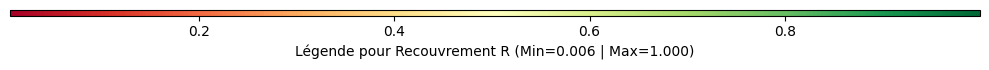

[Sauvegardé Tableau] : eta_0_8000_Avg_nbIter_table.png


[Sauvegardé] : eta_0_8000_Avg_nbIter_legend.png


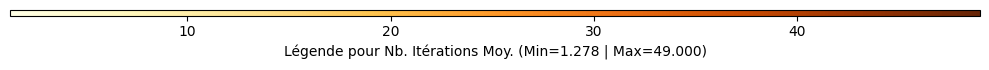

[Sauvegardé Tableau] : eta_0_8000_Temps_execution_s_table.png


[Sauvegardé] : eta_0_8000_Temps_execution_s_legend.png


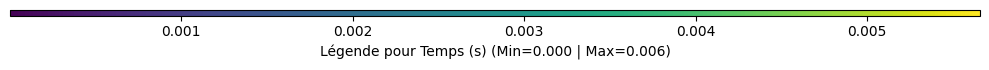

[Sauvegardé Tableau] : eta_0_4000_Avg_R_table.png


[Sauvegardé] : eta_0_4000_Avg_R_legend.png


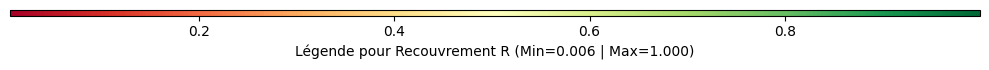

[Sauvegardé Tableau] : eta_0_4000_Avg_nbIter_table.png


[Sauvegardé] : eta_0_4000_Avg_nbIter_legend.png


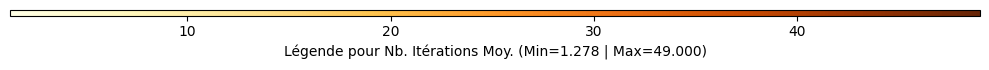

[Sauvegardé Tableau] : eta_0_4000_Temps_execution_s_table.png


[Sauvegardé] : eta_0_4000_Temps_execution_s_legend.png


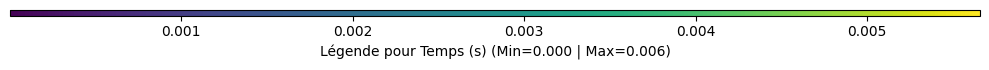

[Sauvegardé Tableau] : eta_0_0800_Avg_R_table.png


[Sauvegardé] : eta_0_0800_Avg_R_legend.png


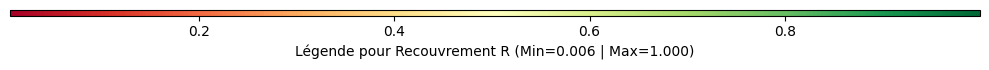

[Sauvegardé Tableau] : eta_0_0800_Avg_nbIter_table.png


[Sauvegardé] : eta_0_0800_Avg_nbIter_legend.png


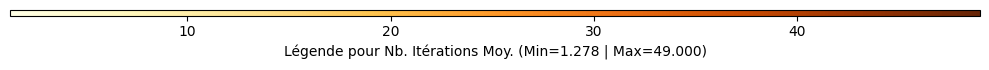

[Sauvegardé Tableau] : eta_0_0800_Temps_execution_s_table.png


[Sauvegardé] : eta_0_0800_Temps_execution_s_legend.png


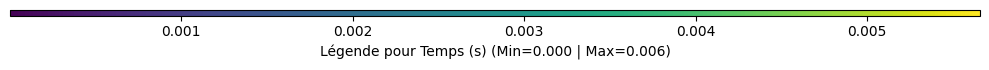

In [73]:
df_results = df_results_imported

# ----------------------------------------------------------------------
# 1. PRÉPARATION : CALCUL DES MIN/MAX GLOBAUX (NON MODIFIÉ)
# ----------------------------------------------------------------------
# (Assurez-vous que cette section est exécutée)
metrics_list = ['Avg_R', 'Avg_nbIter', 'Temps_execution_s']
all_etas_min_max = {}
for metric in metrics_list:
    all_etas_min_max[metric] = {
        'min': df_results[metric].min(),
        'max': df_results[metric].max()
    }
# ----------------------------------------------------------------------

# Liste des taux d'apprentissage uniques (vos 0.8, 0.4, 0.08...)
all_etas = df_results['eta'].unique()
metrics_order = ['Avg_R', 'Avg_nbIter', 'Temps_execution_s']

for eta in all_etas:
    
    # Affichage du titre principal pour ce bloc d'ETA
    display(HTML(f"<h2>--- ANALYSE CONSOLIDÉE POUR ETA = {eta:.4f} ---</h2>"))
    
    styled_tables_info = create_styled_comparison_table(df_results, eta, all_etas_min_max)
    
    for metric in metrics_order:
        
        styled_df, cmap_name, vmin, vmax, metric_label = styled_tables_info[metric]
        
        # --- CRÉATION DU NOM DE FICHIER UNIQUE ---
        eta_str = f"{eta:.4f}".replace('.', '_')
        base_filename = f"eta_{eta_str}_{metric}"
        
        table_filename = f"{base_filename}_table.png"
        legend_filename = f"{base_filename}_legend.png"
        
        # 1. EXPORTATION DU TABLEAU STYLISÉ EN PNG (nécessite dataframe-image)
        try:
            dfi.export(styled_df, table_filename, table_conversion="matplotlib", dpi=300)
            print(f"[Sauvegardé Tableau] : {table_filename}")
        except Exception as e:
            print(f"ATTENTION: Échec de l'exportation du tableau en image. Assurez-vous d'avoir installé 'dataframe-image'. Erreur: {e}")

        # 1b. Afficher le tableau dans le notebook (en HTML)
        display(styled_df)
            
        # 2. EXPORTATION DE LA LÉGENDE (Colorbar) EN PNG
        display_colorbar(
            cmap_name, 
            vmin, 
            vmax, 
            f"Légende pour {metric_label} (Min={vmin:.3f} | Max={vmax:.3f})",
            filename=legend_filename, # <--- Sauvegarde du fichier de légende
            figsize=(10, 0.8)
        )
        
    print("\n" + "=" * 80 + "\n")